# <u><strong>CO2 Emission Dataset</strong></u>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
W=pd.read_csv('tidy_format_co2_emission_dataset.csv')
W.head()

,Country,Year,CO2EmissionRate (mt)
0,Afghanistan,2021,8.35
1,Albania,2021,4.59
2,Algeria,2021,173
3,Angola,2021,24.45
4,Antigua and Barbuda,2021,0.78


In [34]:
W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5572 non-null   object
 1   Year                  5572 non-null   int64 
 2   CO2EmissionRate (mt)  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [35]:
W.groupby('Year')['Year'].count()

Year
1990    199
1991    199
1992    199
1993    199
1994    199
1995    199
1996    199
1997    199
1998    199
1999    199
2000    199
2001    199
2002    199
2003    199
2004    199
2005    199
2006    199
2007    199
2008    199
2009    199
2010    199
2011    199
2012    199
2013    199
2014    199
2015    199
2018    199
2021    199
Name: Year, dtype: int64

In [36]:
W.groupby('Country')['Year'].count()

Country
Afghanistan            28
Albania                28
Algeria                28
Angola                 28
Antigua and Barbuda    28
                       ..
Venezuela              28
Vietnam                28
Yemen                  28
Zambia                 28
Zimbabwe               28
Name: Year, Length: 199, dtype: int64

In [37]:
W.dtypes

Country                 object
Year                     int64
CO2EmissionRate (mt)    object
dtype: object

#### <u>**Above cell shows that CO2EmissionRate (mt) is object datatype instead float show we need to drop unwanted data .**</u>

In [38]:
search_string = '-'
condition = W['CO2EmissionRate (mt)'].str.contains(search_string, case=False, na=False)
W = W[~condition]
W

,Country,Year,CO2EmissionRate (mt)
0,Afghanistan,2021,8.35
1,Albania,2021,4.59
2,Algeria,2021,173
3,Angola,2021,24.45
4,Antigua and Barbuda,2021,0.78
...,...,...,...
5567,Venezuela,2018,3.7
5568,Vietnam,2018,2.8
5569,Yemen,2018,0.4
5570,Zambia,2018,0.3


In [39]:
W['CO2EmissionRate (mt)']=W['CO2EmissionRate (mt)'].str.replace(',','')

W['CO2EmissionRate (mt)']=W['CO2EmissionRate (mt)'].str.replace('_','')

In [40]:
W['CO2EmissionRate (mt)']=W['CO2EmissionRate (mt)'].astype('float32')

In [41]:
W.dtypes

Country                  object
Year                      int64
CO2EmissionRate (mt)    float32
dtype: object

### **In the below cell we observe that year 2021 has very high co2 emission** 

In [42]:
W.nlargest(10,['CO2EmissionRate (mt)'])

,Country,Year,CO2EmissionRate (mt)
38,China,2021,12466.320312
190,United States,2021,4752.080078
85,India,2021,2648.780029
148,Russia,2021,1942.540039
94,Japan,2021,1084.689941
87,Iran,2021,710.830017
69,Germany,2021,665.880005
167,South Korea,2021,626.799988
86,Indonesia,2021,602.590027
157,Saudi Arabia,2021,586.400024


In [43]:
Q=W[W['Year']!=2021]
Q.head()

,Country,Year,CO2EmissionRate (mt)
199,Afghanistan,1990,0.2
200,Albania,1990,2.3
201,Algeria,1990,3.0
202,Angola,1990,0.4
203,Antigua and Barbuda,1990,4.9


#### <u><strong> co2 emission for YEMEN</strong> </u>

In [44]:
yemen1=Q[Q['Country']=='Yemen'].max()
yemen1

Country                 Yemen
Year                     2018
CO2EmissionRate (mt)      1.1
dtype: object

In [45]:
yemen=Q[Q['Country']=='Yemen'].min()
yemen

Country                 Yemen
Year                     1990
CO2EmissionRate (mt)      0.4
dtype: object

#### <u>INDIA'S performance</u> 

In [46]:
India=Q[Q['Country']=='India']
India.nlargest(6,['CO2EmissionRate (mt)'])
India

,Country,Year,CO2EmissionRate (mt)
284,India,1990,0.8
483,India,1991,0.8
682,India,1992,0.9
881,India,1993,0.9
1080,India,1994,0.9
1279,India,1995,1.0
1478,India,1996,1.0
1677,India,1997,1.1
1876,India,1998,1.1
2075,India,1999,1.1


In [47]:
India.nsmallest(6,['Year'])

,Country,Year,CO2EmissionRate (mt)
284,India,1990,0.8
483,India,1991,0.8
682,India,1992,0.9
881,India,1993,0.9
1080,India,1994,0.9
1279,India,1995,1.0


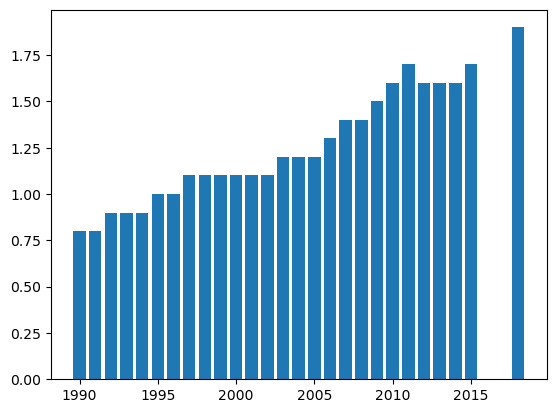

In [48]:
plt.bar(India['Year'],India['CO2EmissionRate (mt)'])
plt.show()

#### **This graph tells us that India's co2 emission is constantly increasing and is highest in year 2018. As the country starts developing it's co2 emission also increases.**

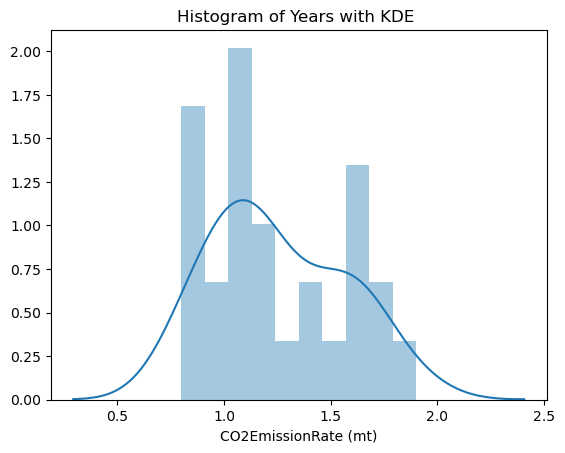

In [49]:
sns.distplot(India['CO2EmissionRate (mt)'],bins=10, kde=True)
plt.title('Histogram of Years with KDE ')
plt.show()

#### **Kernel density estimation curve explains that the most probable is 1.1**

In [50]:
unique_count =Q['CO2EmissionRate (mt)'].nunique()
unique_count

322

### <u><strong>Maximum co2 emitting country every year</strong></u>

In [51]:
max_emmission=Q.groupby('Year').apply(lambda group:group[group['CO2EmissionRate (mt)'] == group['CO2EmissionRate (mt)'].max()])
max_emmission.reset_index(drop=True, inplace=True)
max_emmission[['Country','Year','CO2EmissionRate (mt)']]

,Country,Year,CO2EmissionRate (mt)
0,United Arab Emirates,1990,29.400000
1,Qatar,1991,36.700001
2,Qatar,1992,54.299999
3,Qatar,1993,60.900002
4,Qatar,1994,58.700001
5,Qatar,1995,58.599998
6,Qatar,1996,59.200001
7,Qatar,1997,65.800003
8,Qatar,1998,57.000000
9,Qatar,1999,53.299999


In [52]:
df=max_emmission['Country'].value_counts().to_frame('times')
df1=df.rename_axis('country')
df1 = df1.reset_index()
df1

,country,times
0,Qatar,24
1,Palau,2
2,United Arab Emirates,1


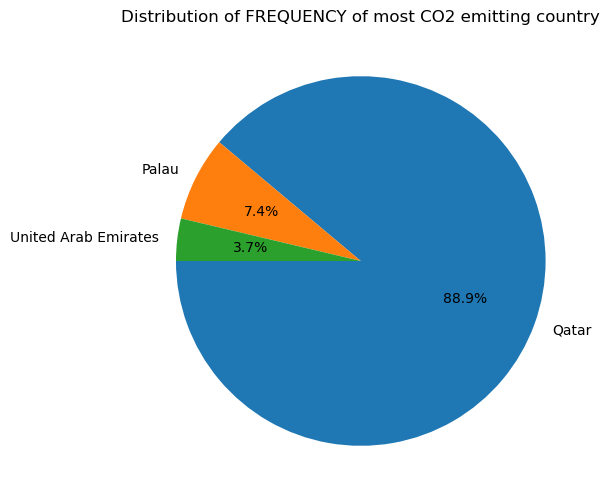

In [53]:
plt.figure(figsize=(6, 6))
plt.pie(df1['times'], labels=df1['country'], autopct='%1.1f%%', startangle=180)
plt.title('Distribution of FREQUENCY of most CO2 emitting country')
plt.show()


#### **From above pie chart we can conclude that QATAR has the highest frequency of CO2 emitting country every year followed by PALAU and UAE .**


### <u><strong>Least co2 emitting country every year</strong><u/>

In [54]:
min_emmission=Q.groupby('Year').apply(lambda group:group[group['CO2EmissionRate (mt)'] == group['CO2EmissionRate (mt)'].min()])
min_emmission.reset_index(drop=True, inplace=True)
min_emmission[['Country','Year','CO2EmissionRate (mt)']]

,Country,Year,CO2EmissionRate (mt)
0,Cambodia,1990,0.0
1,Chad,1990,0.0
2,Mali,1990,0.0
3,Namibia,1990,0.0
4,Nepal,1990,0.0
...,...,...,...
94,Faroe Islands,2015,0.0
95,Burundi,2018,0.0
96,Chad,2018,0.0
97,Democratic Republic of the Congo,2018,0.0


In [55]:
df2=min_emmission['Country'].value_counts().to_frame('Times')
df1=df2.rename_axis('country')
df1 = df1.reset_index()
df1

,country,Times
0,Chad,25
1,Burundi,19
2,Democratic Republic of the Congo,15
3,Somalia,9
4,Uganda,7
5,Mali,6
6,Afghanistan,6
7,Cambodia,5
8,Nepal,2
9,Faroe Islands,2


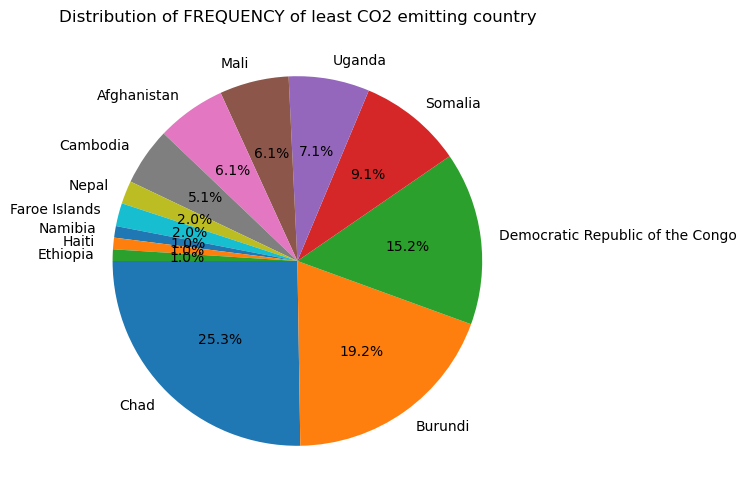

In [56]:
plt.figure(figsize=(6, 6))
plt.pie(df1['Times'], labels=df1['country'], autopct='%1.1f%%', startangle=180)
plt.title('Distribution of FREQUENCY of least CO2 emitting country')
plt.show()

#### **This chart shows frequency of least CO2 emitting country.In this list CHAD is least Co2 emitting country.This chart also explains underdeveloped countries are dominating in this list.**  

#### <u>**Highest co2 emission for every country**</u>

In [57]:
max_emmission1=Q.groupby('Country').apply(lambda group:group[group['CO2EmissionRate (mt)'] == group['CO2EmissionRate (mt)'].max()])
max_emmission1.reset_index(drop=True, inplace=True)
Z=max_emmission1[['Country','Year','CO2EmissionRate (mt)']]


In [58]:
Z= Z.drop_duplicates(subset=['Country'])
Z

,Country,Year,CO2EmissionRate (mt)
0,Afghanistan,2011,0.4
2,Albania,1990,2.3
3,Algeria,2015,3.9
5,Angola,2007,1.4
10,Antigua and Barbuda,2015,6.2
...,...,...,...
494,Venezuela,2002,7.6
495,Vietnam,2018,2.8
496,Yemen,1992,1.1
498,Zambia,1990,0.3


In [59]:
Z[(Z['CO2EmissionRate (mt)'] > 5) & (Z['CO2EmissionRate (mt)'] < 60)]


,Country,Year,CO2EmissionRate (mt)
10,Antigua and Barbuda,2015,6.200000
15,Aruba,1991,29.400000
16,Australia,1998,18.700001
17,Austria,2005,8.800000
18,Azerbaijan,1992,5.900000
...,...,...,...
487,United Arab Emirates,2000,39.099998
488,United Kingdom,1991,10.300000
489,United States,2000,20.000000
491,Uzbekistan,1991,5.400000


### <u>**Top 10 CO2 emmitting country for year 2000**</u>

In [60]:
D=Q.groupby('Country').apply(lambda group:group[group['Year'] == 2000])
D.reset_index(drop=True, inplace=True)

In [61]:
D1=D.nlargest(10,'CO2EmissionRate (mt)')
D1

,Country,Year,CO2EmissionRate (mt)
145,Qatar,2000,56.299999
188,United Arab Emirates,2000,39.099998
99,Kuwait,2000,31.900000
12,Bahrain,2000,30.400000
7,Aruba,2000,24.900000
190,United States,2000,20.000000
26,Brunei,2000,19.600000
107,Luxembourg,2000,18.900000
181,Trinidad and Tobago,2000,18.900000
32,Canada,2000,17.500000


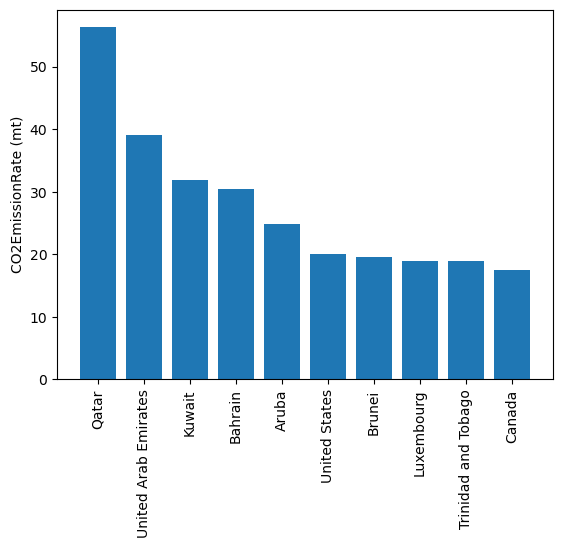

In [62]:
plt.bar(D1['Country'],D1['CO2EmissionRate (mt)'])
plt.xticks(rotation=90)
plt.ylabel('CO2EmissionRate (mt)')
plt.show()